$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\text{i}}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$

In [1]:
from IPython.display import Image, display, YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100  # for crisper figures later

*Readings:*

* *Morin 4.1-4.2*
* *phase space: Gollub & Baker 2.1*

# Expectations

## Remember

* The simple harmonic oscillator (SHO) equation, $\ddot x + \omega^2_0 x = 0$.
* For the pendulum, $\omega^2_0 = g/\ell$; for the mass+spring system, $\omega^2_0 = k/m$.
* Solutions to the SHO are in the form of $A\eexp{i(\omega_0 t + \phi)}$, or any equivalent form.
* A phase space diagram of an oscillation is a plot of the oscillation on a ($\dot x, x$) graph, with the trace parameterized by time.

## Understand

* What the linear regime means.
* What linearizing entails.
* That an SHO is the combination of an inertial process (e.g., mass inertia, magnetic induction...) and of a restoring process (e.g., spring stiffness, capacitance...)
* Similarities in Physics: if two ODEs have the same form, the mathematical solutions will also look the same.

## Create and apply

* From a set of two initial conditions (e.g. initial position **and** initial velocity, for the pendulum system), how to compute the complete evolution of the system.
* How to apply knowledge from one type of oscillator (e.g., pendulum) to obtain the solutions of a difference kind of oscillator (e.g., mass+spring).
* The "adopt-an-exponential" method.
* ... and the worked out examples and tutorials

Before I introduce the main oscillator of this chapter and the two after that (i.e., the mass+spring system), let me introduce you to another oscillator we will use often: the pendulum.
See below (Jupyter) or at https://youtu.be/QPpatmnS3bs.

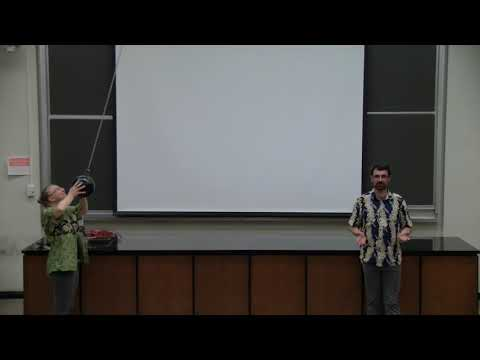

In [2]:
YouTubeVideo('QPpatmnS3bs', width=800, height=300)

# Simple harmonic oscillators (SHOs)

A simple harmonic oscillator is a system where a restoring force, i.e., a force that always tries to bring back (restore) the system to its equilibrium, is the only one to balance inertia ($ma$).
Most notably, there is no friction in the system.
Restoring and inertia are trapped in a dance where restoring brings the system to equilibrium, but inertia makes it overshoot, bringing restoring back into action, etc.

## Equations of motion

Consider the spring-mass system in the PhET simulation below (and at https://phet.colorado.edu/en/simulation/hookes-law). An ideal spring (that is, a weightless, dissipationless spring) of stiffess $k > 0$ [in N.m$^{-1}$, or kg.s$^{-2}$], attached to a fixed wall on one end, and an objet of mass $m$ [kg] on the other.

In [3]:
%%html
<iframe src="https://phet.colorado.edu/sims/html/hookes-law/latest/hookes-law_en.html" width="800" height="600" scrolling="no" allowfullscreen></iframe>

Let $x$ be the position of the centre of mass of the object. $x=0$ at rest, $x\neq 0$ otherwise.
Let's also assume the mass can slide on the surface without friction, and that the spring is "perfect" (that is, weightless and can oscillate without dissipation).

An equivalent system is the one I am presenting below (Jupyter notebook) and at https://youtu.be/cMjn04ivOfE.

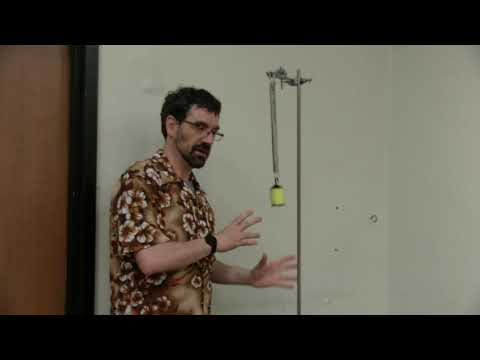

In [40]:
YouTubeVideo('cMjn04ivOfE', width=800, height=300)

We now pull the mass to position $x = x_0 \neq 0$ and hold it there.
If $x_0$ is "not too big", the spring will not deform or break.
In this case, the force of the spring on the mass is (Hooke's law)
$$F = -kx_0.$$

* The negative sign means that the force is a **restoring force** (tends to bring back to origin).
* $k$ being constant, the force is proportional to the distance from rest state. It makes this force linear: if I double the distance, I double the force.
    See the second lecture for a discussion about how to make it non-linear.
    Later, we will talk about the pendulum, for which the process of linearizing is more transparent.

Let us now release our spring.
The motion of the object has to obey Newton's second law, which constitutes an equation of motion.
$$ ma = F\ \Rightarrow\ m\ddot{x} = -kx.$$
The equation above is a second-order Ordinary Differential Equation (ODE), which we saw before.

Let 
\begin{equation}
    \label{eq:SHO}
    \omega_0^2 = \frac{k}{m} \ \Rightarrow \ \ddot{x} + \omega_0^2 x = 0.
\end{equation}

**Quick unit check:** Because $k$ is in kg.s$^{-2}$ and $m$ is in kg, $\omega_0$ is in s$^{-1}$ in SI units.

Why did I feel the need to add the subscript "$0$" in $\omega_0$?
In an SHO, there is indeed only one $\omega$ so why bother? Because soon, we will add a bit of friction, and the situation will be more complicated.

## General Solutions

From last lecture and tutorial, we know that the solution to the equation above has many equivalent forms, namely,

* $x(t) = A\cos(\omega_0 t + \phi)$,
* $x(t) = B \sin(\omega_0 t + \psi)$,
* $x(t) = C \cos(\omega_0 t) + D \sin (\omega_0 t)$,
* $x(t) = E \eexp{i \omega_0 t} + E^* \eexp{-i \omega_0 t}$,  (see tutorial 2)
* $x(t) = \text{Re}(G \eexp{i \omega_0 t})$.

Note that there are always two free parameters:

* $A$ and $\phi$,
* $B$ and $\psi$,
* $C$ and $D$,
* $E$ is two-dimensional: it has a pair of real and imaginary parts, or a pair of magnitude and phase, whichever is more convenient,
* $G = 2E$ (see tutorial 2 again).

It reflects the fact that our solution is entirely determined by two pieces of information: the initial positions and velocities, $x_0$ and $v_0$.
It also reflects the fact that a mathematician teaching you about ODEs will tell you that a linear $n^\text{th}$-order equation has two linearly-independent solutions (these facts are not independent from one another).

We will call this type of motion SImple Harmonic Motion (SHM).
The acronyms then read: an SHO describes SHM.

Of all these possible forms, the ones that will prove the most useful are the last two, with the complex exponentials.
The reason is not particularly obvious for the SHO, because all forms are quite convenient to handle, but sticking to exponentials will prove invaluable when equations become more complicated.
So, let's take a step back, pretend we never heard of oscillations during the last lecture, and let us be falsely naive.

We will use what I (and only I, as far as I know) call the "***adopt-an-exponential***" method.
We will "test" if the function
$$x(t) = a\eexp{rt}, \with (a, r) \in \mathbb C^2,$$
can be a solution, and under which conditions.
And to know that, we will plug it in the equation of motion, and let it "adopt" the exponential, i.e., tell us which $r$ would work.

Note that $r\in \mathbb C$, but unlike $\cplxi \omega$, it is not purely imaginary and may have a real part.
The letter $r$ stands for "root".

Plugging in, $\ddot x = r^2 a \eexp{rt}$, and eqn. \eqref{eq:SHO} becomes
$$(r^2 + \omega_0^2)x(t) = 0.$$
So, either $r^2 =- \omega_0^2$, or $x(t)=0$, and we want it to be true all the time.
Now, the latter cannot be zero *all the time*, otherwise... well, there would be no oscillation to study.
Therefore, it has to be
$$r^2 = -\omega_0^2\thrfor r = \pm\sqrt{-1}\omega_0 = \pm \cplxi \omega_0.$$
The $\pm$ is important: it is what tell us that two linearly independent solutions can satisfy this equation, and that the general solution has to be a linear combination of those:
$$x(t) = a_1\eexp{\cplxi\omega_0} + a_2\eexp{-\cplxi\omega_0}.$$
The ODE has adopted two exponentials, and is excited to see them grow up (or, more accurately, oscillate).

To complete the adoption process, the *two* initial conditions will tell us what $a_1$ and $a_2$ are.
We've seen it in Tutorial #2: to keep $x$ purely real, we need $a_2 = a_1^*$, and if $x_0$ and $v_0$ are the initial position and velocity, then
$$a_1 = \frac12\left(x_0 - \cplxi\frac{v_0}{\omega_0}\right),$$
with the amplitude $A = 2|a_1| = \sqrt{x_0^2 + v_0^2/\omega_0^2}$ and an initial phase defined by $\cos\phi = x_0/A$ and $\sin\phi = -v_0/(\omega_0 A)$.

Let us plot this, with the option to change various parameters:

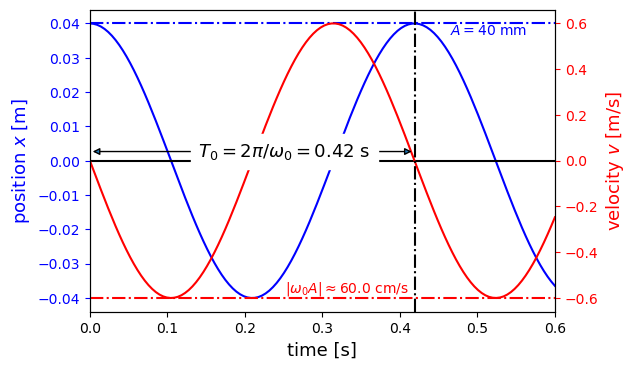

In [27]:
plot_SHO(k=180., m=0.8, x0=4e-2, v0=0.)  # default plot for pdf export
plt.show()

In [28]:
from ipywidgets import interact, FloatSlider
interact(plot_SHO, k=180, m=0.8, x0=FloatSlider(min=-0.1, max=0.1, step=1e-2, value=4e-2), v0=FloatSlider(min=-0.5, max=0.5, step=1e-2, value=0.))

interactive(children=(IntSlider(value=180, description='k', max=540, min=-180), FloatSlider(value=0.8, descrip…

<function __main__.plot_SHO(k, m, x0, v0)>

I have already said it, but let me repeat it: careful about the phase: it is tempting to use $\arctan$, $\arcsin$ or $\arccos$ to say $\phi=\dots$, but one vlue for these functions usually corresponds to two possible arguments in the $[0, 2\pi)$ interval.
You always need two pieces of info to settle what the phase is.

# Phase space representation of an oscillation

A phase space plot, or "phase portrait", or "phase diagram", is a plot of velocity or momentum versus position, parameterized by time.  These plots are used extensively in the study of ordinary differential equations, dynamical systems, studies of chaos, and so on. In these notes, we want to develop techniques for calculating and interpreting phase space plots.

Suppose we have a particle undergoing sinusoidal motion according to $x=A\cos\omega_0 t$, with period $T_0 = 2\pi/\omega_0$.
Its velocity is $\dot x = -\omega_0 A\sin\omega_0 t$. Say, for example, its a mass on a spring.  We can plot the times series for $x$ and $v$ like below.

In [32]:
omega0 = 1.0  # angular frequency
T0 = 2*np.pi/omega0  # period
t = np.arange(0, 3*T0, np.pi/100)  # time array
A = 1.0  # amplitude
phi = np.pi/4  # initial phase
x = A*np.cos(omega0*t + phi)  # position
v = -omega*A*np.sin(omega0*t+phi)  # velocity

xnorm = x/A  # necessary only if we change A
vnorm = v/A/omega  # necessary only if we change A or omega

In [33]:
def plot_xv_t():
    """ First figure shows time series of x and v """
    plt.plot(t/T0, xnorm, label=r'$x/A$')
    plt.plot(t/T0, vnorm, '--', label=r'$v/(A\omega_0)$')
    plt.legend()
    plt.title('Time series')
    plt.xlabel(r'$t/T_0$')
    plt.xlim(t[0]/T0, t[-1]/T0)
    plt.grid()
    return

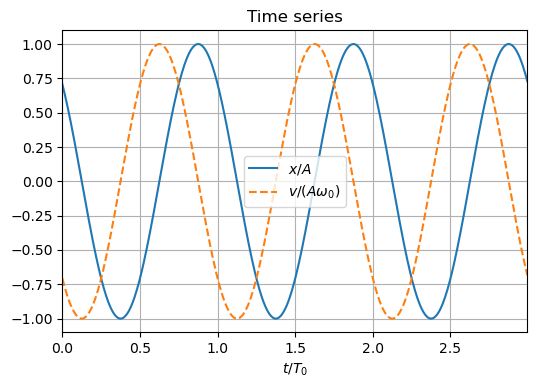

In [34]:
plot_xv_t()

This plot contains a lot of redundant information and it is not necessarily easy to see a clear relationship between $x$ and $v$.

The phase portrait takes $x$ and $v$ as coordinates in the plane, and plots the parametric curve
$$\left(x(t),v(t)\right)=\left(A\cos\omega_0 t,-\omega_0 A\sin\omega_0 t\right),$$
which describes an ellipse with horizontal and vertical axes.
Let's plot it.

In [37]:
def plot_phase_SHM():
    """ Second figure shows phase diagram """ 
    plt.plot(xnorm, vnorm)
    plt.xlabel(r'$x/A$')
    plt.ylabel(r'$v/(\omega_0 A)$')
    plt.arrow(xnorm[0], vnorm[0], xnorm[1]-xnorm[0], vnorm[1]-vnorm[0], width=0.05)
    plt.grid()
    plt.title('Phase portrait')
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.2, 1.1])
    plt.axhline(0., color='k')  # $v=0$ axis
    plt.axvline(0., color='k')  # $x=0$ axis
    plt.axis('equal')
    return

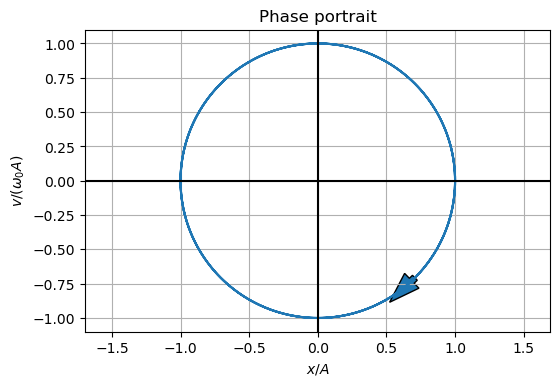

In [38]:
plot_phase_SHM()

This curve describes the whole motion because it's periodic.
With a bit of practice, the following pieces of info are more legible than on the time series plots:
* Points where the extension $x$ is extremal are points where $v=0$, and points of maximum velocity occur at $x=0$.
* It proceeds clockwise (negative direction), as indicated by the arrow. It highlights that $v$ precedes $x$ in phase: when $v/(\omega_0 A) = -1$ (its minimal value), we will have $x/A = -1$ one-quarter cycle later.

The plot above looks like a circle in the $(x/A, \dot x/(\omega_0 A))$ coordinates, or an ellipse when the axes aren't stretched as arbitrarily.
To see why, recall that $x^2 = A^2\cos^2(\omega_0 t)$ and $\dot x^2 = \omega_0^2 A^2\sin^2(\omega_0 t)$. Thus,
$$\frac{x^2}{A^2}+\frac{\dot x^2}{\omega_0^2 A^2}=\cos^2(\omega_0 t)+\sin^2(\omega_0 t) =1,$$
which is the equation of an ellipse in the ($x, \dot x$) plane, or a circle in the ($x/A, \dot x/(\omega_0 A)$) space.

We will often plot systems of interest in phase space, as a way of summarizing their behaviour.

# The pendulum

Now that we have nailed the undamped mass+spring system, let's consider a different oscillator, the pendulum.
In doing so, I want to show you two things:
* An illustration of a non-linear oscillator, and how to linearize the system.
* That the equations are generic, the particular physics of a system being contained in the coefficients involved in the equations. In other words, if you can do it with a mass+spring system, you can do it with any other SHO.
* A foray into unstable behaviour and non-linear phenomena.

## Equation of motion

Consider a mass $m$ at the end of a pendulum of length $\ell$, released from near its downward position, as sketched below (Morin, fig. 4.2). See also the PhET simulation that follows (and at https://phet.colorado.edu/en/simulation/pendulum-lab; just do the intro to see what we're talking about).

<img src="Morin_4_2.png" alt="Drawing" style="width: 150px;"/>

In [8]:
%%html
<iframe src="https://phet.colorado.edu/sims/html/pendulum-lab/latest/pendulum-lab_en.html" width="800" height="600" scrolling="no" allowfullscreen></iframe>

Since the mass at the end of the pendulum undergoes circular motion, it makes sense to use the angle $\theta$ as our variable.

But first, a law that is more or less known, and often forgotten: the arc length of an arc circle of radius $\ell$ and angle $\theta$ in rad is simply $s=\ell\theta$ (for example, the circumference of the whole circle would be $2\pi\ell$; the length of an arc circle of angle 1 rad is $\ell$, by definition of the unit radian).
The acceleration *along the arc of the trajectory*, a.k.a. the tangential acceleration, is therefore
$$a_\theta = \ell \ddot \theta.$$

The mass $m$ is subjected to two forces: 

* the tension force $\vec T$ that attaches it to the pendulum, oriented along the pendulum arm towards the centre and perpendicular to the trajectory,
* the weight, $\vec F = -mg\unit z$.

Projected *along the tangential direction of the trajectory*, $\vec T\cdot \unit\theta = 0$, and the weight is $F_\theta = - m g\sin\theta$ (see sketch below). 

<img src="pendulum_sketch.png" alt="Drawing" style="width: 300px;"/>

This means that $F_\theta = -mg\sin\theta$, and
\begin{equation}
    \label{eq:PendulumNL}
    m\ell\ddot\theta=-mg\sin\theta \oreq \boxed{\ddot\theta=-\frac g\ell\sin\theta}.
\end{equation}
The above equation is a 2nd order homogeneous ODE, but it is **nonlinear** because of the $\sin\theta$ ("If I double $\theta$, I double the acceleration... not").
This means we can't solve the equation with our guess-an-exponential method (you can try... not much you can do about $\sin(A\eexp{bt})$).
Later on we will learn how to solve this equation, but for now we are going to consider a restricted version of this pendulum, one that we have been discussing before: the *linear version*.

## Linear pendulum: simple harmonic motion

Indeed, I promised I would stick to linear phenomena, which I compared with *gentle physics*, the physics of small deviations from equilibrium.
But here, we made not such approximation and $\theta$ can swing wildly.
So, let's do it: let's assume $\theta\ll 1$ and ***linearize*** this equation.

For small $\theta$ we have $\sin\theta\approx\theta$ (from the Taylor expansion) and under this approximation the equation becomes (replacing $\approx$ with $=$)
\begin{equation}
    \label{eq:PendulumLin}
    \ddot\theta+\frac gl\theta=0.
\end{equation}
So in this special case (for small angle) we get a **linear** 2nd-order homogeneous ODE.  This we know how to solve.

$\sin\theta$ was a nonlinear function of $\theta$, and by linearizing the system we can guarantee that the solutions are simpler to find and satisfy the superposition principle ("double the amplitude..." is a special case of superposing the same signal onto itself).

Notice that the form of equation \eqref{eq:PendulumLin} is exactly the equation we had before for the mass on a spring which gave SHM except that now $\omega_0=\sqrt{g/\ell}$ instead of $\sqrt{k/m}$.
So this case is equivalent to the spring case, as long as $\theta\ll1$.
But recall that a spring has its own linear regime of small $x$, "small" being compared to... well, by how much $x$ has to be to start seeing prominent non-linear phenomena such as maximum compression or permanent deformation.
It's just that the pendulum make the non-linear regime "cleaner" to describe with mathematical expressions.

Exactly like for the mass + spring system, we have solutions of the form 
$$\theta=\theta_0\cos\omega_0 t + \frac{\dot\theta_0}{\omega_0} \sin\omega_0 t.$$


Pendulums have an interesting history. The following fun facts are a regurgitation of https://en.wikipedia.org/wiki/Pendulum#History and should motivate you to read about it:

* Galileo noticed that the period of a pendulum was independent of amplitude as long as it was small by looking at a giant chandelier hanging off of Pisa's cathedral's ceiling (you can look up pictures of this pendulum, apparently it still exists), and independent of mass.
* Huygens used it to make very nice clocks that only deviated by 15 seconds per day instead of the 15 minutes of the previous technology.
* People used it to measure $g$ on various points of Earth, leading to a very accurate measure of the shape of the Earth very early on.

## Larger oscillations: the non-linear pendulum

### General angles

We will probably revisit this case later, but for now, let's just go further in the Taylor expansion of $\sin\theta$, that is, 
$$\sin\theta = \theta - \frac{\theta^3}{3!} + \frac{x^5}{5!} + O(\theta^7).$$
Let's truncate this expansion to the first two terms and plug it back in eqn. \eqref{eq:PendulumNL} to obtain
$$\ddot\theta + \frac g\ell\left(\theta - \frac{\theta^3}6\right)=0.$$
Note that I did not use the notation $\omega_0$ here.
This is because I want $\omega_0$ to retain its special meaning as the angular frequency of linear oscillations.
Because we don't have it anymore, and because the angular frequency of oscillations is now different, I prefer to keep $\sqrt{g/\ell}$.

This equation is actually quite famous, and not just about pendulums.
It is called the undamped, undriven Duffing equation.
If it were damped and driven, it would exhibit chaotic behaviour (see e.g. https://en.wikipedia.org/wiki/Duffing_equation).

For the free version of it (undamped, undriven), there is an analytical formula for the period $T$ for any $\theta_{max}$ for the full eqn. \ref{eq:PendulumNL}, although it does not involve solving the ODE, but rather conservation of energy (see Morin, exercise 4.23 on p. 124).
Because I want to postpone energy considerations to a little later, I will just write down this solution, which is
$$T = \sqrt{\frac{8 \ell}{g}} \int_0^{\theta_{max}}\frac{\di \theta}{\sqrt{\cos\theta - \cos\theta_{max}}}.$$

At this point though, it's more of a fun fact.

### Starting from the upward position

Now consider a trickier case: a pendulum released from its upward position. We know that the system will not oscillate about a nearby point, because it is unstable.
So what do we do?

Using an FBD one finds $F_{\theta} = -mg\sin \theta$ again, Newton's 2nd law is still $\ddot\theta = - (g/\ell)\sin\theta$.
I will use 
$$\sigma = \sqrt{g/\ell}$$
from now on, because this quantity will still hold a special importance, though not as an angular frequency.

We are starting near the angle $\theta=\pi$.
Because we like our small numbers, let's define a new angle for which the initial angle is zero.
That is, define
$$\theta=\pi-\delta.$$
Then, $\sin\theta = \sin(\pi-\theta)$ (easy to see if you draw a circle), $\dot\theta=-\dot\delta$ and $\ddot\theta=-\ddot\delta$ and Newton's 2nd law becomes
$$\ddot \delta - \sigma^2 \sin\delta = 0.$$

Note that $\delta=0$ is a possible steady solution of the equation above.
This is what it means to be unstable: it could stay there forever if nothing were to perturb it, but the smallest perturbation will dramatically throw it off-balance. 
This is opposite to the $\theta = 0$ case, where the smallest perturbation will just create the smallest oscillations, trying to bring the system back to its equilibrium position.
But this is also in opposition to any other $\theta \neq 0$ or $\theta \neq \pi$ case: those aren't associated with any $\ddot \theta = 0$ situation, they are simply out-of-equilibrium (which is different from unstable).

We can linearize the solution again to small $\delta$'s.
The regime of validity of this approximation will not be as wide as the stable case (pendulum down): there, if $\theta \ll 1$ during one oscillation, it will stay that way for ever and the SHO equation will also be valid forever.
In the present case, the pendulum will eventually go wayyy down and back wayyyyy up.
But the linearization
$$\ddot\delta - \sigma^2 \delta = 0$$
should be valid for a few initial moments.

Notice the specific difference compared to the pendulum "down" case.
In that case, we had a "$+$" sign in between the terms.
Now we have a "$-$" sign, and that will make all the difference.

To solve this equation we notice that it is a 2nd order, linear, homogeneous ordinary differential equation so we try the "adopt-an-exponential" method again: try $x=Ae^{r t}$ and solve for $r$.
Doing so gives $r=\pm \sigma$.
The exponent is now real instead of complex in the pendulum "down" case, and we will not see oscillations.

We can now write the solutions as exponential functions,
\begin{align*}
\delta(t) & = Ae^{\sigma t}+Be^{-\sigma t}\\
          & = C\cosh(\sigma t) + D\sinh(\sigma t)\\
          & = E\cosh(\sigma t + \phi_1),
\end{align*}
etc., are all equivalent.
The coefficients are again determined by the initial conditions.

We cannot start at exactly $\delta = 0$, because in theory it would stay there for ever.
Instead, consider an initial angle $\delta(t=0) = \delta_0 \ll 1$ but $\neq 0$, with $\dot\delta_0=0$. Using the 2nd form above,
$$\delta(t) = C\cosh(\sigma t) + D\sinh(\sigma t) \andeq \dot\delta(t) = \sigma C\sinh (\sigma t) +\sigma D\cosh (\sigma t)$$
and plugging in the initial conditions, we find
$$\delta_0=C \andeq 0=D.$$

So, 
$$\delta(t)=\delta_0\cosh \sigma t=\frac{\delta_0}2\left(e^{\sigma t}+e^{-\sigma t}\right).$$
In this case, the solutions are exponentially growing as $t$ increases: a small perturbation grows arbitrarily large with a time scale of $\sqrt{\ell/g}$ called the "growth rate" (Covid modellers would call it $R_0$). This case is *linearly unstable* (because this is all very linear).
But recall that the motion exponentially moves away from the axis only in the initial moments, when the angle is still small.
Beyond that, there be nonlinear dragons.

And what about the phase plot of this motion? Stay tuned...

# Summary

In this lecture, we saw the following.

* How to derive the motion of a SHO using ODE science and the "adopt-an-exponential" method.
* How to completely determine SHM based on initial position and velocity.
* How to linearize a non-linear equation of motion, from the pendulum example, assuming small deviations from rest and Taylor expansions.
* What a phase portrait, also called phase diagram or phase-space plot, is, illustrated with the case of SHM.
* How to predict the shape of the phase portrait based on the $x$, $v$ solutions in simple cases.
* A first exposure to what a non-linear oscillator is.
* A first exposure to linear instability analysis.